# Germany Contribution Metrics

In [2]:
# import relevant libraries
%matplotlib inline
import json
import matplotlib
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import squarify
from functools import reduce

In [4]:
data_id = [7546, 7563, 8655, 8658, 7530, 7580, 8649]

directory = '/Users/steven/Documents/Developer/data_science/football/data/raw/'

# consequently read the json and concatenate into a pre-defined dataframe
all_france = pd.DataFrame()
for i in data_id:
    with open(directory + str(i) + '.json') as data_file:
        data = json.load(data_file)
    df = json_normalize(data, sep = '_')
    if all_france.empty:
        all_france = df
    else:
        all_france = pd.concat([all_france, df], join = 'outer', sort = False)

In [5]:
data_id = [7567, 7534, 7551]

directory = '/Users/steven/Documents/Developer/data_science/football/data/raw/'

# consequently read the json and concatenate into a pre-defined dataframe
germany_all = pd.DataFrame()

for i in data_id:
    with open(directory + str(i) + '.json') as data_file:
        data = json.load(data_file)
    df = json_normalize(data, sep = '_')
    if all_france.empty:
        germany_all = df
    else:
        germany_all = pd.concat([germany_all, df], join = 'outer', sort = False)

In [6]:
germany_all = germany_all[germany_all.team_name == "Germany"]

Let's say we are interested in the following statistics per player across the tournament
- Total number of dribbles
- Total number of completed dribbles
- Total number of passes
- Total number of failed passes
- Total number of dispossession

In [7]:
# count total number of dribble
total_dribble = germany_all.groupby('player_name')['type_name'].apply(lambda x:(x=='Dribble').sum()).reset_index(name='total_dribble')
# number of dribble completed
dribble_complete= germany_all.groupby('player_name')['dribble_outcome_name'].apply(lambda x: (x=='Complete').sum()).reset_index(name='dribble_completed')
# total number of pass
total_pass = germany_all.groupby('player_name')['type_name'].apply(lambda x: (x=='Pass').sum()).reset_index(name='total_pass')
# number of incomplete pass
pass_incomplete = germany_all.groupby('player_name')['pass_outcome_name'].count().reset_index(name='incomplete_pass')
# number of times being dispossessed
dispossessed = germany_all.groupby('player_name')['type_name'].apply(lambda x: (x=='Dispossessed').sum()).reset_index(name='dispossessed')

In [8]:
df_list = [total_dribble, dribble_complete, total_pass, pass_incomplete, dispossessed]
summary_data = reduce(lambda x, y: pd.merge(x, y, on = 'player_name'), df_list)
summary_data

,player_name,total_dribble,dribble_completed,total_pass,incomplete_pass,dispossessed
0,Antonio Rüdiger,0,0,86,6,1
1,Jonas Hector,2,1,107,16,0
2,Joshua Kimmich,2,1,265,47,0
3,Julian Brandt,3,1,25,2,0
4,Julian Draxler,7,5,81,9,2
5,Jérôme Boateng,0,0,184,22,2
6,Leon Goretzka,1,1,22,2,0
7,Manuel Neuer,2,1,79,11,0
8,Marco Reus,2,1,126,23,1
9,Mario Gómez García,0,0,13,6,0


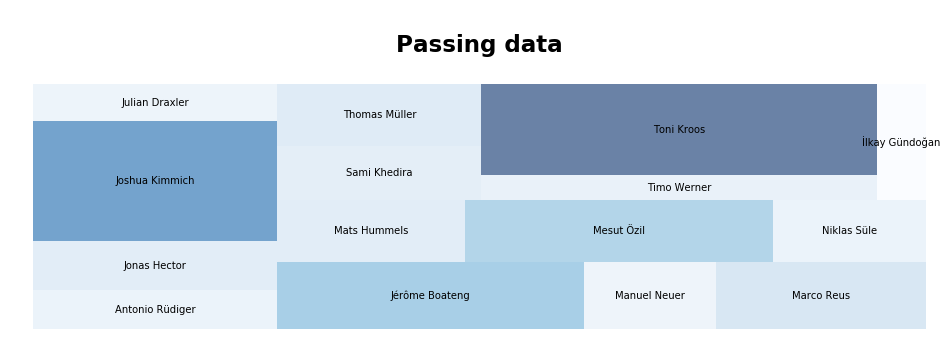

In [9]:
# new dataframe, containing only players with more than 50 passes
dataPass = summary_data[summary_data["total_pass"] > 50]

# utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(dataPass.total_pass), vmax=max(dataPass.total_pass))
colors = [matplotlib.cm.Blues(norm(value)) for value in dataPass.total_pass]

# create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

# use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label = dataPass.player_name, sizes = dataPass.total_pass, color = colors, alpha = .6)
plt.title("\n Passing data \n", fontsize = 23, fontweight = "bold")

# remove our axes and display the plot
plt.axis('off')
plt.show()

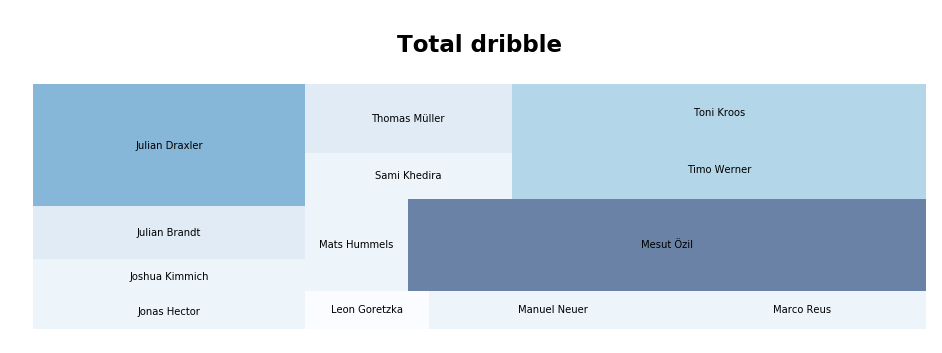

In [10]:
dataDribble= summary_data[summary_data["total_dribble"] > 0]

# matplotlib scale our goal numbers between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin = min(dataDribble.total_dribble), vmax = max(dataDribble.total_dribble))
colors = [matplotlib.cm.Blues(norm(value)) for value in dataDribble.total_dribble]

# create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

# use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=dataDribble.player_name,sizes=dataDribble.total_dribble, color = colors, alpha=.6)
plt.title("\n Total dribble \n",fontsize=23,fontweight="bold")

# remove our axes and display the plot
plt.axis('off')
plt.show()